速度Verlet算法的计算公式如下  
$$\boldsymbol{r}^{(n+1)}_i=\boldsymbol{r}^{(n)}_i+h\boldsymbol{v}^{(n)}_i+\boldsymbol{F}^{(n)}_ih^2/2m$$
$$\boldsymbol{v}^{(n+1)}_i=\boldsymbol{v}^{(n)}_i+h(\boldsymbol{F}^{(n+1)}_i+\boldsymbol{F}^{(n)}_i)/2m$$

用速度Verlet算法计算一维谐振子  
$$
\left\{
{\begin{array}{cc}
    F(x)=-kx \\
    x(t=0)=1.0\\
    v(t=0)=0.0\\
\end{array} }
\right.
$$
取$k=1,m=1,h=0.1$

In [1]:
import numpy as np

def F(x):
    return -x

r0 = 1.0
v0 = 0.0

h = 0.1

r_list = [r0]
v_list = [v0]
F_list = [F(r0)]

t_tot = 20.0

N = int(t_tot/h)

for i in range(N):
    r_list.append(r_list[i] + h*v_list[i] + F_list[i]*h*h/2)
    F_list.append(F(r_list[i+1]))
    v_list.append(v_list[i] + h*(F_list[i+1] + F_list[i])/2)

Verlet速度算法的结果与解析解$r(t)=\cos{(t)}$比较

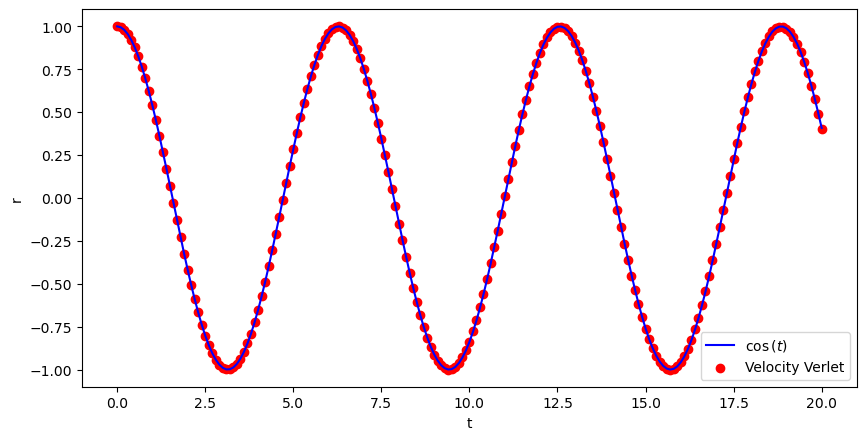

In [2]:
import matplotlib.pyplot as plt

t = np.linspace(0, t_tot, len(r_list))
x = np.cos(t)

plt.figure(figsize=(10,5), dpi=100)
plt.xlabel('t')
plt.ylabel('r')
plt.plot(t, x, color='blue', label='$\cos{(t)}$')
plt.scatter(t, r_list, color='red', label='Velocity Verlet')
plt.legend()
plt.show()